# Programming Exercise 1: Linear Regression
##                     Exercise 1 with extras

I have decided to follow the structure of ex1.pdf file provided by Andrew NG thats walks through the exercise in an intuitive manner. I have kept the names of the functions to be coded identical so it is easier to cross reference them as one goes through this Python script. I have added some additional utility functions to make my life easier. Additionally you will notice a the markdown text followed by a straight line, which allows to spot the functions required to be coded with ease.

In [1]:
# All required libraries and functions  are imported in this cell
from __future__ import division     # Enable floating point division i.e. to get 3/4=0.75 insted of 0
import os as os                     # Operating system funcitons for navigation pursposes
import numpy as np                  # Numerical Library for matrix operations
import matplotlib.pyplot as plt     # Plotting Library 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Sharp plots  

data_dir="C:/GitHub/ML_Coursera/ex1/data/"


from IPython.display import display, HTML
# I love my  figs in center and text left aligned will this figure out in future
#CSS = """.output {align-fig: center;}"""
#HTML('<style>{}</style>'.format(CSS))


## Utility Functions

In [2]:
# Return the contents of the data file
def load_data(data_dir,f_name):                       
    os.chdir(data_dir)
    data=np.loadtxt(f_name,delimiter=',')
    return data

# Generate a dicitonary of plotting parameters, makes it easier to edit similar figures
def fig_details(limits,figspan,title_pos,marker,markersize,markeredgecolor,linewidth,\
                xlabel='',ylabel='',title='',label='',grid=False):
    fig_dt={}
    fig_dt['limits']=limits
    fig_dt['figspan']=figspan
    fig_dt['xlabel']=xlabel
    fig_dt['ylabel']=ylabel
    fig_dt['label']=label
    fig_dt['title']=title
    fig_dt['title_pos']=title_pos
    fig_dt['mk']=marker
    fig_dt['ms']=markersize
    fig_dt['mec']=markeredgecolor
    fig_dt['lw']=linewidth
    fig_dt['grid']=grid
    #fig_dt['legend']=legend
    return fig_dt

## 1 Simple Python function 

#### warmUpExercise-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
# warmUpExercise: Generate 5x5 identity matrix
def warmUpExercise():
    return np.identity(5)

In [4]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 2 Linear Regression with one variable

## 2.1 Plotting the Data

#### Load Data

In [5]:
data=load_data(data_dir,f_name='ex1data1.txt')
x=data[:,0]
y=data[:,1]

#### plotData-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
# fig_dt is dictionary that stores plot variables
def plotData(x,y,fig_dt):  
    plt.figure(figsize=fig_dt['figspan'])
    plt.plot(x,y, fig_dt['mk'], ms=fig_dt['ms'],mec=fig_dt['mec'],lw=fig_dt['lw'], \
             label=fig_dt['label'])
    plt.xlabel(fig_dt['xlabel'])
    plt.ylabel(fig_dt['ylabel'])
    plt.title(fig_dt['title'], y=fig_dt['title_pos'])
    plt.axis(fig_dt['limits'])
    plt.grid(fig_dt['grid'],linestyle='dotted')

#### Make the plot

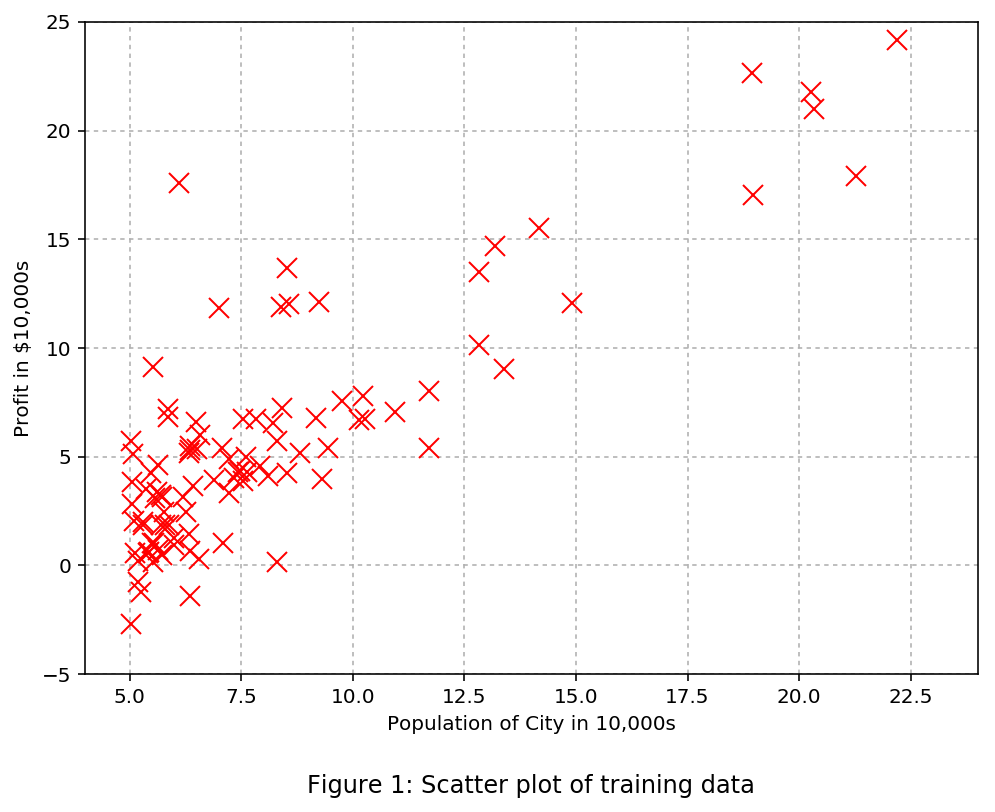

In [7]:
# Execute the utilty function for plotData to generate fig_dt to specify plot variables
fig_dt=fig_details(limits=[4,24,-5,25],figspan=(8,6),xlabel='Population of City in 10,000s',\
                  ylabel='Profit in $10,000s',title='Figure 1: Scatter plot of training data',\
                  title_pos=-0.2,marker='rx',markersize=10,markeredgecolor='r',\
                  linewidth=1,grid=False)
# Execute plotData
plotData(x,y,fig_dt)

## 2.2 Gradient Descent

### 2.2.1 Update Equations

In [8]:
# Define Linear Hypothesis Function
def l_hyp(X,theta):
    return np.matmul(X, theta)

#### computeCost (computeCostMulti)-------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Define Cost Function
def computeCost(X,y,theta):                       
    H=l_hyp(X,theta)                              # compute hypothesis 
    error=H-y                                     # Calculate error vector
    J=np.matmul(error,error.T)/(2*m)              # Cost computation formula
    return J, error                               # Return error since we are manually coding gradient descent

In [10]:
# Define update rule for theta
def thetaUpdate(theta,X,error,alpha):
    theta = theta-(alpha/m)*np.matmul(np.transpose(X),error) # Calculate new values of theta
    return theta

### 2.2.2 Implementation

In [11]:
m     = x.shape[0]                                # Number of training examples
x_mat = np.c_[np.ones(m),x]                     # Add a column of ones to x
n     =  x_mat.shape[1]                            # Parameters of Linear Regression w/ x0# Number of theta's
itheta =np.zeros(n)                           # Iitialize theta      

In [12]:
# Initialize parameters other than theta
iterations=1500                               # Number of iterations for Gradient Descent
alpha=0.01                                    # Learning rate

### 2.2.3 Computing the cost

In [13]:
icost,ierror=computeCost(x_mat,y,itheta)                           # compute cost

print 'Computed cost:',icost,"\n",\
      'Expected cost: 32.07'              

Computed cost: 32.0727338775 
Expected cost: 32.07


### 2.2.4 Gradient descent

#### gradientDescent (gradientDescentMulti)----------------------------------------------------------------------------------------------------------------------------------

In [14]:
# gradientDescenttMulti: gradientDescent is a vectorized general version applicable in this situation
def gradientDescent(X,y,theta,learningRate,num_iters):
    m = X.shape[0]                                       # number of training examples   
    J_history = np.zeros(num_iters+1)                    # Store cost values @ every iteration step to see if it converges
    
    icost,ierror=computeCost(X,y,theta) 
    J_history[0]=icost                                   # Cost for initial guess
    
    for i in range(num_iters):
        cost,error=computeCost(X,y,theta)
        theta=thetaUpdate(theta,X,error,learningRate)
        J_history[i+1]=cost
    return theta, J_history

In [15]:
theta,J_history=gradientDescent(X=x_mat,y=y,theta=itheta,learningRate=alpha,num_iters=iterations)
predict1=np.matmul([1,5],theta)
predict2=np.matmul([1, 23], theta)

print predict1,predict2

2.20152031227 23.1960426183


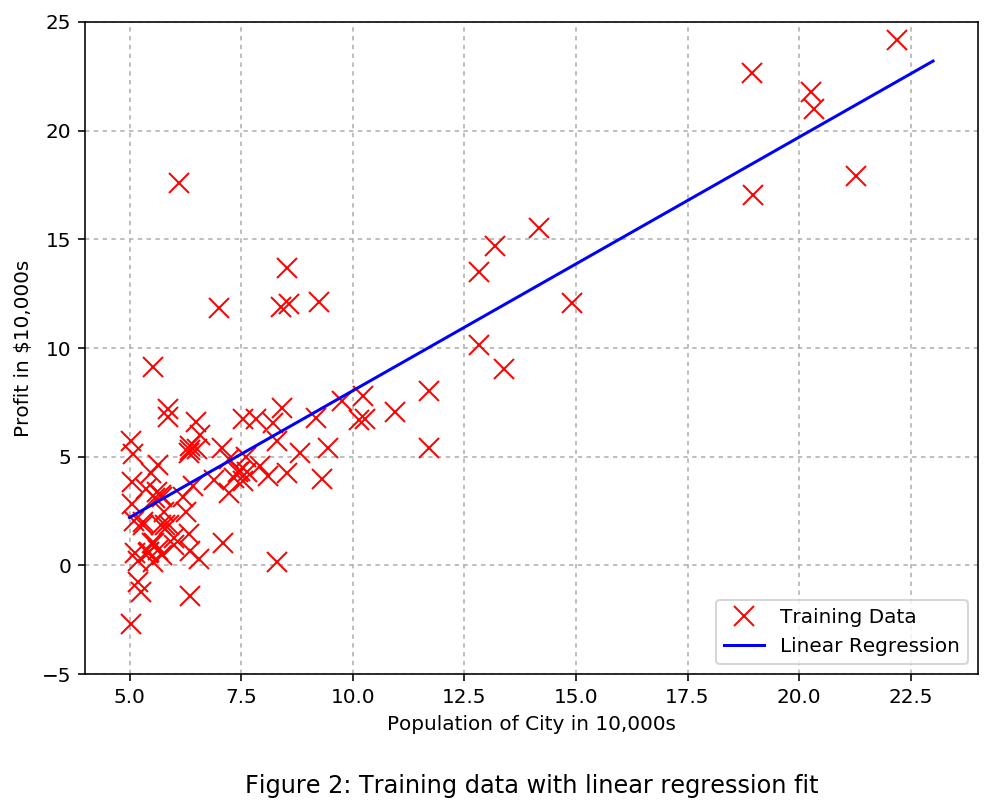

In [16]:
fig_dt['title']='Figure 2: Training data with linear regression fit'    
fig_dt['label']= 'Training Data'
plotData(x,y,fig_dt)
plt.hold=True
plt.plot([5,23],[predict1,predict2],'b-',label='Linear Regression')
plt.legend(loc=4)

## 2.3 Debugging: (did not need it)

## 2.4 Visualizing J(theta)

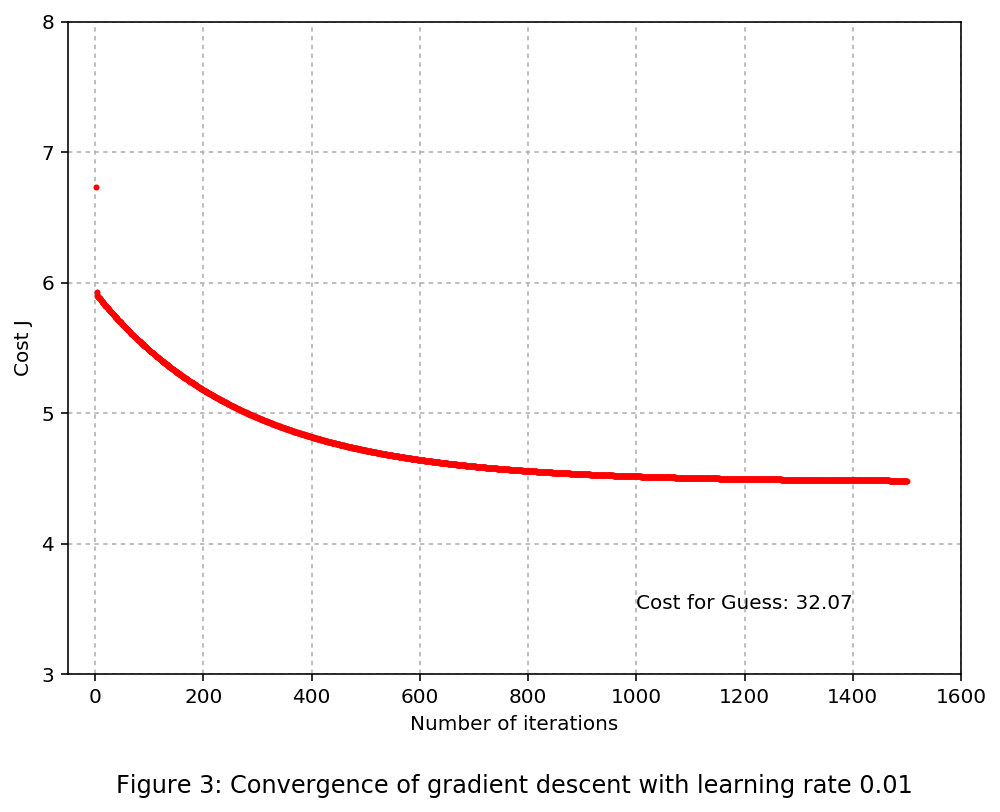

In [17]:
# Lets configure the plot vaiables
fig_dt=fig_details(limits=[-50,1600,3,8],figspan=(8,6),xlabel='Number of iterations',\
                  ylabel='Cost J',title='Figure 3: Convergence of gradient descent with learning rate 0.01',\
                  title_pos=-0.2,marker='ro',markersize=2,markeredgecolor='r',\
                  linewidth=1,grid=False)

# Lets see how cost function got optimized
plotData(np.arange(1,iterations+1),J_history[1:],fig_dt)
plt.text(1000,3.5,'Cost for Guess: %0.2f'%J_history[0])


We can see here that cost function drops rapidly in the beginning when guess is away from actual answer and it slows down later. To solve the problem of slow convergence we will use readily avaible functions in python library: scipy.optimize in future exercises that contains efficint algorithms.

## 3 Linear regression with multiple variables (Optional Exercise)

#### Load Data

In [18]:
data=load_data(data_dir,f_name='ex1data2.txt') 
x=data[:,:-1]
y=data[:,-1]
m=x.shape[0]                         # Number of training examples
n=x.shape[1]+1                       # Add 1 to account for theth0

print 'm = ',m,"\n", "n = ",n

m =  47 
n =  3


## 3.1 Feature Normalization

#### featureNormalize-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
def featureNormalize(x): 
    columnWiseMean   = np.mean(x,axis=0)                # mean of individuL features
    columnWiseStdDev = np.std(x,axis=0)                 # standard dev of inddivial features
    return (x-columnWiseMean)/columnWiseStdDev, \
            columnWiseMean,  columnWiseStdDev           # x_n is normalized x

In [20]:
x_n,mu,sigma=featureNormalize(x)
x_mat=np.c_[np.ones(m),x_n]                             # Add a row of ones to x_n
print 'Orignial x[0:5] \n',x[0:5,:],'\n Normalized x[0:5] \n',x_n[0:5,:]

Orignial x[0:5] 
[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]] 
 Normalized x[0:5] 
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


## 3.2 Gradient Descent

#### Estimate the cost function for intial guess and compare from figure 

In [21]:
# computeCostMulti: computCost is a vectorized general version applicable in this situation
itheta=np.zeros(n)
cost,error= computeCost(x_mat,y,itheta)
print 'Computed cost: %10g'%cost
print 'Aprroximate Estimated cost: 6.5*10^10'

Computed cost: 6.55915e+10
Aprroximate Estimated cost: 6.5*10^10


In [22]:
# Provide gradient descent and execute the gradeintDescent parameters
iterations=50
alpha=0.1
theta,J_history=gradientDescent(X=x_mat,y=y,theta=itheta,learningRate=alpha,num_iters=iterations)

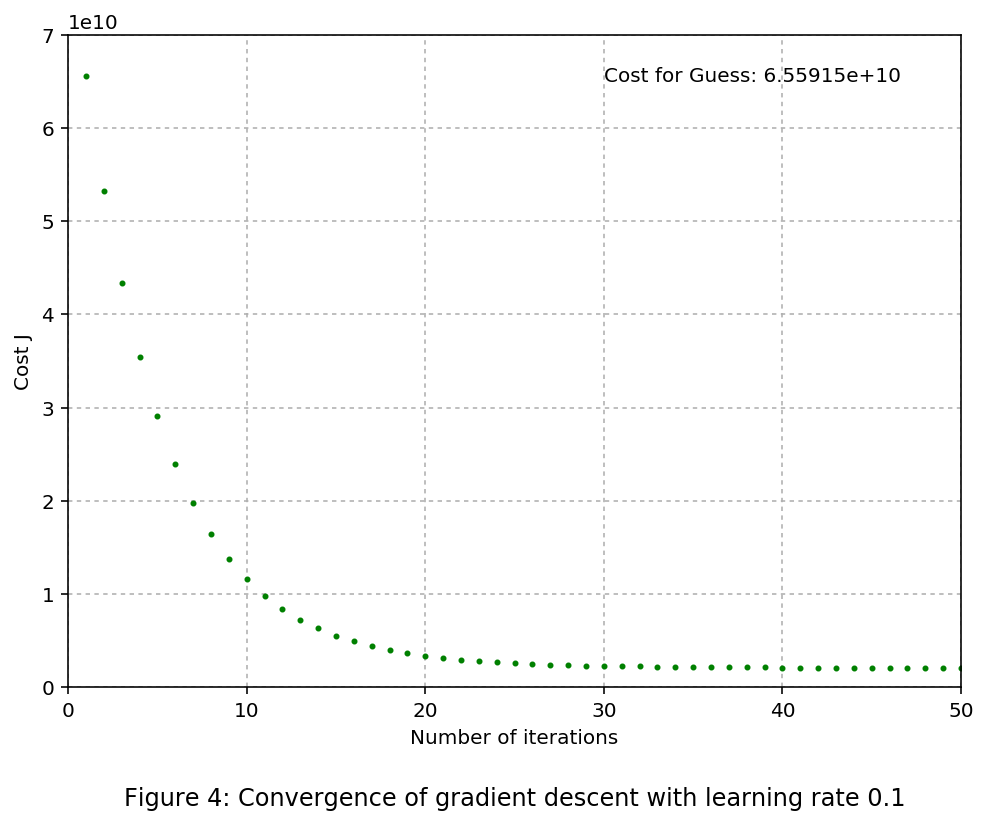

In [23]:
fig_dt=fig_details(limits=[0,50,0,7*10**10],figspan=(8,6),xlabel='Number of iterations',\
                  ylabel='Cost J',title='Figure 4: Convergence of gradient descent with learning rate 0.1',\
                  title_pos=-0.2,marker='go',markersize=2,markeredgecolor='g',\
                  linewidth=1,grid=False)
plotData(np.arange(1,iterations+1),J_history[1:],fig_dt)
plt.text(30,6.5*10**10,'Cost for Guess: %10g'%J_history[0])

In [24]:
# Predict price for house with 3 bedrooms and floor area of 1650 sq. feet
test_x=[1650,3]

# The model parameters are fit to normalized data
test_xn=(test_x-mu)/sigma
testx=[1, test_xn[0], test_xn[1]]
print 'The price of the house is  $ %0.2f'%l_hyp(testx,theta)

The price of the house is  $ 292679.07


## 3.3 Normal Equations 

#### normalEqn----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
# We will use pinv (pseudoinverse function) which stops the code from crashing when matrixto be inverted is not full ranked 
def normalEqn(X,y):
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(X.T,X)),X.T),y)

In [26]:
x_mat=np.c_[np.ones(m),data[:,:-1]]
theta_analytic=normalEqn(x_mat,y)
print 'House price based on analytical solution is $%0.2f' %l_hyp([1, 1650, 3],theta_analytic)

House price based on analytical solution is $293081.46
